In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

mat_content = sio.loadmat( 'face(1).mat' )

face_data = mat_content[ 'X' ]

face_data_labels = mat_content[ 'l' ]

print( 'Face Data Shape: {}'.format( face_data.shape ) )
print( 'Face Data Labels Shape: {}'.format( face_data_labels.shape ) )

faceDataLabeled = np.vstack( ( face_data, face_data_labels ) )

print( 'Face Data Labeled Shape: {}'.format( faceDataLabeled.shape ) )

Face Data Shape: (2576, 520)
Face Data Labels Shape: (1, 520)
Face Data Labeled Shape: (2577, 520)


In [2]:
#Randomized Train test Split 42
train_label, test_label = train_test_split( faceDataLabeled.T, test_size = 0.3, random_state = 42 )
#Stratified Train test Split
# train_label, test_label = train_test_split( face_data.T, stratify = face_data_labels, test_size= 0.2 )

train_label = train_label.T.astype( 'float64' )
test_label  = test_label.T.astype( 'float64' )

print( 'Shape of Train Set {}'.format( train_label.shape ) )
print( 'Shape of Test Set {}'.format( test_label.shape ) )

Shape of Train Set (2577, 364)
Shape of Test Set (2577, 156)


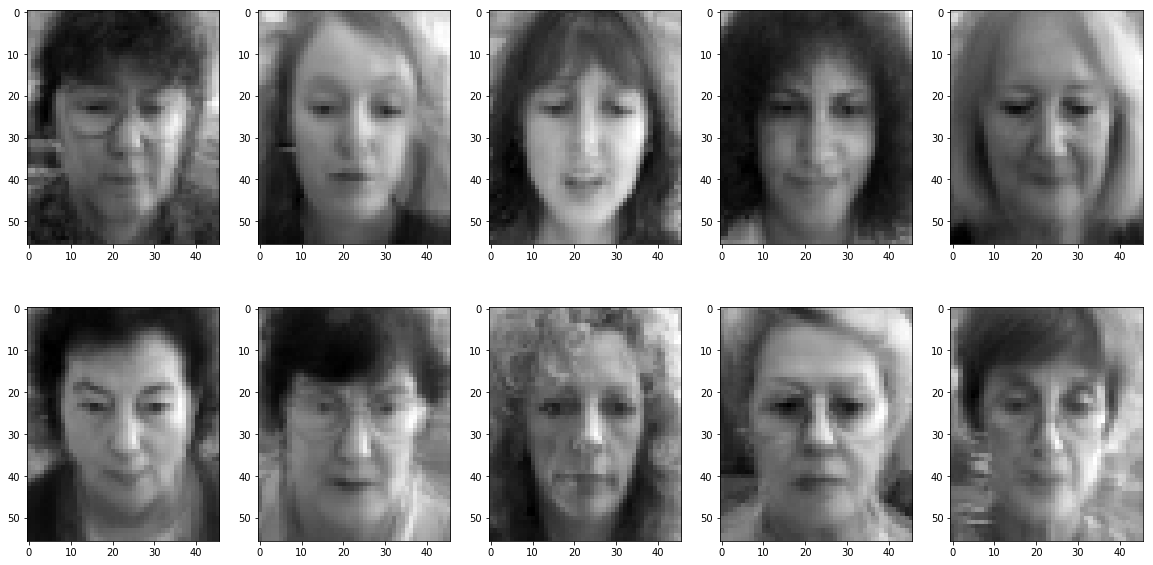

In [3]:
#Compute the Class Mean 
ClassMean = np.zeros((face_data.shape[0],52))
Num = np.zeros((52,1))
# print(ClassMean.shape)
# print(train_label.shape[1])
for i in range(train_label.shape[1]):
    ClassMean[:,train_label[2576,i].astype( 'int' )-1] = ClassMean[:,train_label[2576,i].astype( 'int' )-1] + train_label[: - 1,i]
    Num[train_label[2576,i].astype( 'int' )-1] = Num[train_label[2576,i].astype( 'int' )-1] + 1

for i in range(ClassMean.shape[1]):
    ClassMean[:,i] = ClassMean[:,i] / Num[i]
    

fig = plt.figure( figsize = ( 20, 10 ) )

for i in range( 10 ):
    eigen_face_img    = np.reshape( ClassMean[:,i], ( 46, 56 ) )
    fig.add_subplot( 2, 5, i+1 )
    plt.imshow( eigen_face_img.T, cmap = 'gist_gray' )
    
plt.show()
fig.savefig("Q2meanface.png")

(2576, 364)
(2576,)


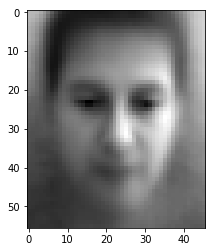

In [4]:
#Calculation of the mean face
print(train_label[: - 1].shape)
mean_face = np.mean( train_label[ : - 1 ], axis = 1) 
print(mean_face.shape)
mean_face_img = np.reshape(mean_face,(46,56))
plt.imshow( mean_face_img.T, cmap = 'gist_gray')

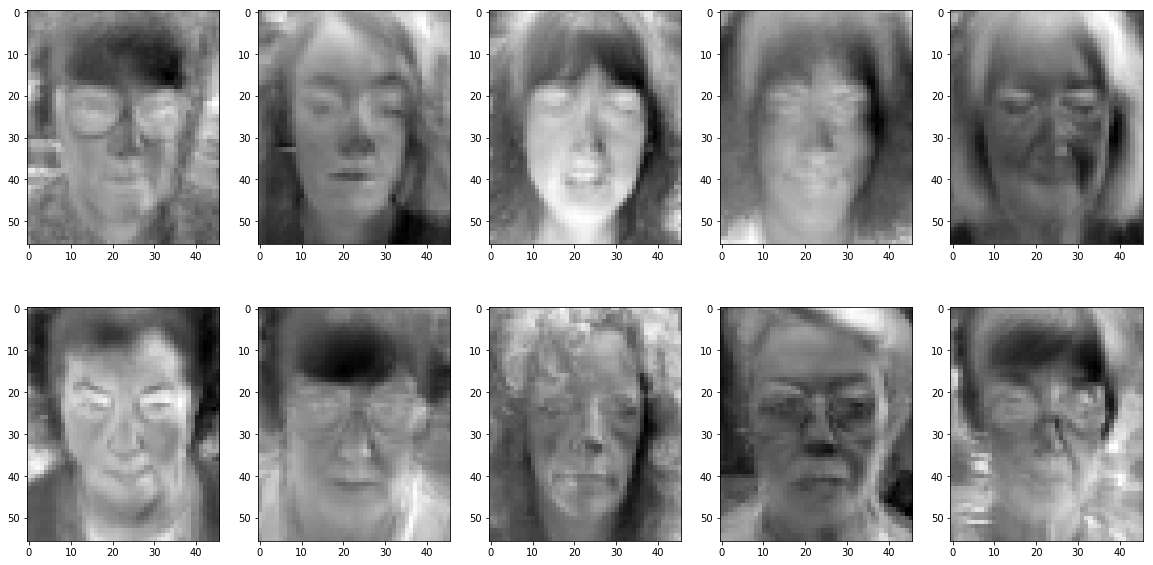

In [35]:
#Calculate Sb 
Sb = np.zeros((face_data.shape[0],52))
for i in range(Sb.shape[1]):
    Sb[:,i] = ClassMean[:,i] - mean_face
    
fig = plt.figure( figsize = ( 20, 10 ) )

for i in range( 10 ):
    eigen_face_img    = np.reshape( Sb[:,i], ( 46, 56 ) )
    fig.add_subplot( 2, 5, i+1 )
    plt.imshow( eigen_face_img.T, cmap = 'gist_gray' )
    
plt.show()
fig.savefig("Q2meanface.png")

Sb = np.matmul(Sb,Sb.T)


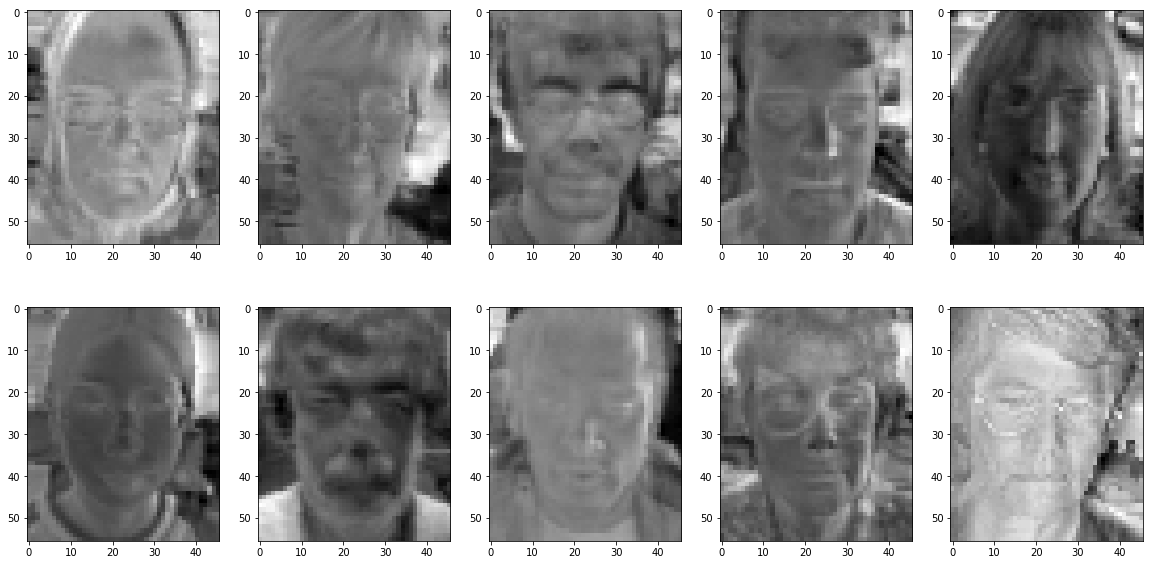

In [44]:
#Calculate Sw 
Sw = train_label.astype( 'int' )
for i in range(Sw.shape[1]):
    Sw[: -1,i] = Sw[:-1,i] - ClassMean[:,Sw[-1 :,i].item()-1]
    
fig = plt.figure( figsize = ( 20, 10 ) )

for i in range( 10 ):
    eigen_face_img    = np.reshape( Sw[: -1,i], ( 46, 56 ) )
    fig.add_subplot( 2, 5, i+1 )
    plt.imshow( eigen_face_img.T, cmap = 'gist_gray' )
    
plt.show()
fig.savefig("Q2meanface.png")

label = Sw[-1 :, :]
Sw = np.matmul(Sw[: -1,:],Sw[: -1,:].T)

#Compute the Class Mean 
ClassMean = np.zeros((face_data.shape[0],52))
Num = np.zeros((52,1))
# print(ClassMean.shape)
# print(train_label.shape[1])
for i in range(train_label.shape[1]):
    ClassMean[:,train_label[2576,i].astype( 'int' )-1] = ClassMean[:,train_label[2576,i].astype( 'int' )-1] + train_label[: - 1,i]
    Num[train_label[2576,i].astype( 'int' )-1] = Num[train_label[2576,i].astype( 'int' )-1] + 1

for i in range(ClassMean.shape[1]):
    ClassMean[:,i] = ClassMean[:,i] / Num[i]
    

fig = plt.figure( figsize = ( 20, 10 ) )

for i in range( 10 ):
    eigen_face_img    = np.reshape( ClassMean[:,i], ( 46, 56 ) )
    fig.add_subplot( 2, 5, i+1 )
    plt.imshow( eigen_face_img.T, cmap = 'gist_gray' )
    
plt.show()
fig.savefig("Q2meanface.png")

In [41]:
np.linalg.matrix_rank(Sw[: -1, : -1])

363

In [46]:
Sw.shape

(2576, 2576)

In [47]:
np.linalg.matrix_rank(Sw)

363

In [43]:
Sb.shape

(2576, 2576)